# Librerías
Aquí van todas las librerías que usemos, para que al volver a "correr todo", no haya errores tontos :3

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ETL:
Ver si es necesario, si hay NaN, si se abre bien el archivo, etc.

In [5]:
df = pd.read_csv('perretes_final.csv', sep=',')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,Dog breed,lifetime_cost,intellingence_ranking,longevity,size_category,weight_kg,shoulder_height_cm,intelligence_category,obey_first_command_%_of_time,genetic_diseases,house_type,owners_physical_activity,tricks,Distrito,Renta media/pers (€),Áreas caninas (m²)
2145,Saint Bernard,20.671831,19.182123,7.617800,large,68.073101,66.980680,Fair,>30,"heart, hip disorders, fatal stomach bloat",Finca,Muy frecuente,yes,Barajas,19482.0,5810.0
2146,Saint Bernard,18.987878,18.322465,8.080945,large,69.553902,67.025702,Fair,>30,"heart, hip disorders, fatal stomach bloat",Apartamento mediano,Muy frecuente,yes,Puente de Vallecas,10941.0,3843.0
2147,Saint Bernard,19.060335,17.985421,7.363878,large,65.865740,68.705457,Fair,>50,"heart, hip disorders, fatal stomach bloat",Apartamento pequeño,Frecuente,yes,Retiro,23925.0,6736.0
2148,Saint Bernard,20.607925,17.452974,7.839965,large,62.912167,69.818395,Fair,>30,none,Apartamento mediano,Frecuente,yes,Retiro,23925.0,6736.0
2149,Saint Bernard,18.993084,18.835058,8.176060,large,70.557580,69.820491,Fair,<30,none,Jardín Amplio,Frecuente,yes,Retiro,23925.0,6736.0


In [6]:
df.isna().any().any()

False

Vale, tenemos un df limpito, cualquiera diría que es a la carta...

# EDA
Aquí voy a hacer algún análisis para ver las correlaciones que hay entre las variables y demás, pues eso, EDA

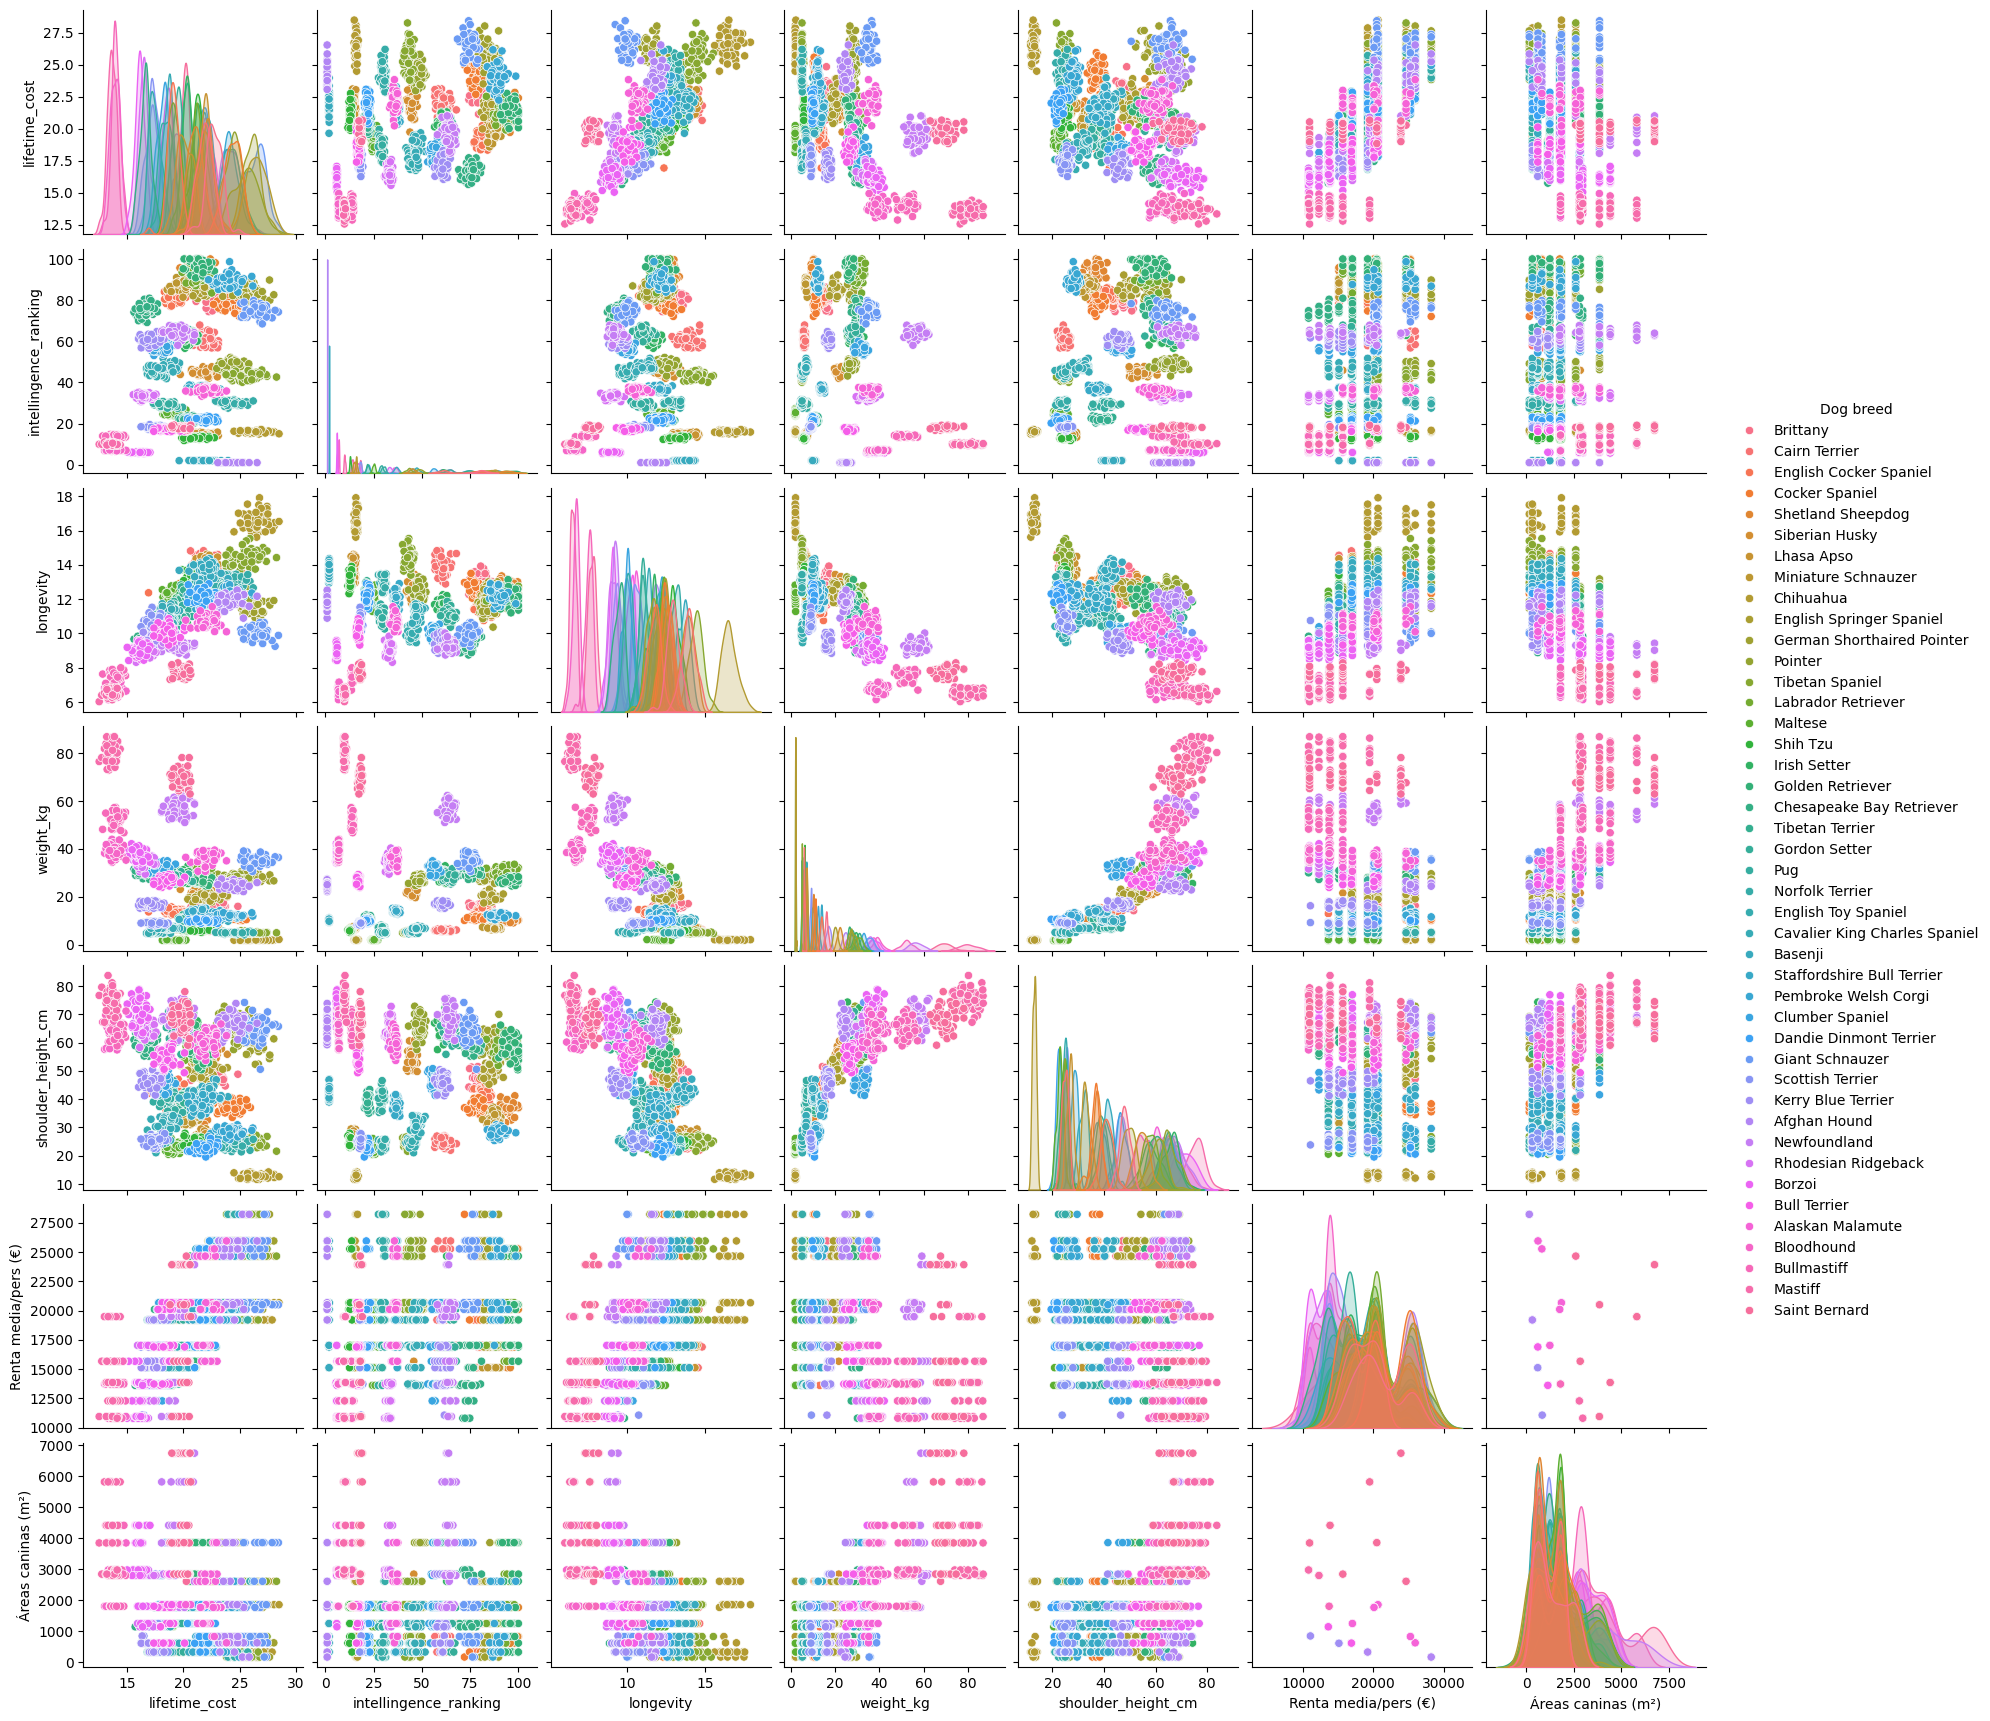

In [12]:
sns.pairplot(df, hue='Dog breed')

Tiene mejor aspecto que el anterior dataset, pero la verdad que no veo bien las correlaciones ._.

In [13]:
df.columns

Index(['Dog breed', 'lifetime_cost', 'intellingence_ranking', 'longevity',
       'size_category', 'weight_kg', 'shoulder_height_cm',
       'intelligence_category', 'obey_first_command_%_of_time',
       'genetic_diseases', 'house_type', 'owners_physical_activity', 'tricks',
       'Distrito', 'Renta media/pers (€)', 'Áreas caninas (m²)'],
      dtype='object')

In [15]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time     object
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
dtype: object

In [19]:
correlation_matrix = df[['lifetime_cost',
                        'intellingence_ranking',
                        'longevity',
                        'weight_kg',
                        'shoulder_height_cm',
                        'Renta media/pers (€)',
                        'Áreas caninas (m²)']].corr()
corr_df=pd.DataFrame(correlation_matrix)
corr_df = corr_df.round(3)
corr_df

,lifetime_cost,intellingence_ranking,longevity,weight_kg,shoulder_height_cm,Renta media/pers (€),Áreas caninas (m²)
lifetime_cost,1.000,0.281,0.740,-0.412,-0.304,0.710,-0.283
intellingence_ranking,0.281,1.000,0.173,-0.112,0.033,0.220,-0.131
longevity,0.740,0.173,1.000,-0.765,-0.655,0.519,-0.479
weight_kg,-0.412,-0.112,-0.765,1.000,0.838,-0.298,0.624
shoulder_height_cm,-0.304,0.033,-0.655,0.838,1.000,-0.215,0.483
Renta media/pers (€),0.710,0.220,0.519,-0.298,-0.215,1.000,-0.200
Áreas caninas (m²),-0.283,-0.131,-0.479,0.624,0.483,-0.200,1.000


Se pueden ver muy bien las correlaciones, la única pena es que con las variables de tipo 'object' no funciona, habría que hacer una conversión/encoder (Ej.: OrdinalEncoder, OneHotEncoder), para la próxima lo hago.

En cualquier caso, se puede ver que el único por encima de un 80% de correlación, que recordemos que por convenio se dice que a partir de ese porcentaje se dice que son variables altamente correlacionadas, es el ""weight_kg - shoulder_height_cm"", poca sorpresa.

Hay otras como ""longetivity - lifetime_cost"", ""Renta media/pers (€) - lifetime_cost"", ""longevity - weight_kg"", que también tienen relaciones muy fuertes, pero que no llegan al mínimo.

Por lo que, visto lo visto, weight_kg se podría predecir de manera fácil por las variables longevity y shoulder_height_cm.